In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fd=pd.read_excel('advertising_sales_data.xlsx')
print(fd)

    Campaign     TV  Radio  Newspaper  Sales
0      camp1  230.1   37.8       69.2   22.1
1      camp2   44.5   39.3       45.1   10.4
2      camp3   17.2   45.9       69.3   12.0
3      camp4  151.5   41.3       58.5   16.5
4      camp5  180.8   10.8       58.4   17.9
..       ...    ...    ...        ...    ...
195  camp196   38.2    3.7       13.8    7.6
196  camp197   94.2    4.9        8.1   14.0
197  camp198  177.0    9.3        6.4   14.8
198  camp199  283.6   42.0       66.2   25.5
199  camp200  232.1    8.6        8.7   18.4

[200 rows x 5 columns]


In [ ]:
fd.isna().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [ ]:
# We update the missing values of radio with the mean of the Radio sales for advertising
fd['Radio']=fd['Radio'].fillna(fd['Radio'].mean())
print(fd)

    Campaign     TV  Radio  Newspaper  Sales
0      camp1  230.1   37.8       69.2   22.1
1      camp2   44.5   39.3       45.1   10.4
2      camp3   17.2   45.9       69.3   12.0
3      camp4  151.5   41.3       58.5   16.5
4      camp5  180.8   10.8       58.4   17.9
..       ...    ...    ...        ...    ...
195  camp196   38.2    3.7       13.8    7.6
196  camp197   94.2    4.9        8.1   14.0
197  camp198  177.0    9.3        6.4   14.8
198  camp199  283.6   42.0       66.2   25.5
199  camp200  232.1    8.6        8.7   18.4

[200 rows x 5 columns]


In [ ]:
fd.isna().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


QUESTIONS

1.	What is the average amount spent on TV advertising in the dataset?
2.	What is the correlation between radio advertising expenditure and product sales?
3.	Which advertising medium has the highest impact on sales based on the dataset?
4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.
5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?
6.	How does the performance of the linear regression model change when the dataset is normalized?
7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?







1) Average amount spent on TV advertising

In [ ]:
print('The average amount spent for TV advertising is:',fd['TV'].mean())

The average amount spent for TV advertising is: 147.0425


2) Correlation

In [ ]:
value_corr=fd[['Radio','Sales']].corr()
print(value_corr)

          Radio     Sales
Radio  1.000000  0.349651
Sales  0.349651  1.000000


3) Highest impact on sales

In [ ]:
TV_corr=fd[['TV','Sales']].corr()
Radio_corr=fd[['Radio','Sales']].corr()
Newspaper_corr=fd[['Newspaper','Sales']].corr()
print(TV_corr)
print(Radio_corr)
print(Newspaper_corr)

             TV     Sales
TV     1.000000  0.901208
Sales  0.901208  1.000000
          Radio     Sales
Radio  1.000000  0.349651
Sales  0.349651  1.000000
           Newspaper    Sales
Newspaper    1.00000  0.15796
Sales        0.15796  1.00000


In [ ]:
# From the correlation values we can see that the TV has the highest immpact on sales
print("The highest impact on sales is:",TV_corr['Sales'].max())

The highest impact on sales is: 1.0


4) Linear Regression

In [ ]:
#Splitting for training and testing
X=fd[['TV','Radio','Newspaper']]
y=fd['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Linear Regression model training the data
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

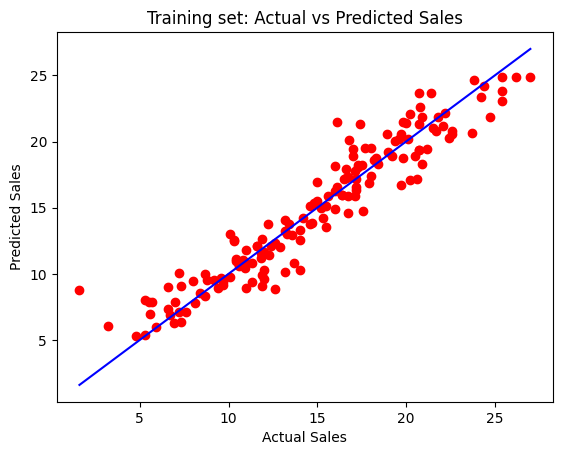

In [ ]:
#Predicting on new data and evaluate its performance
y_pred = lr.predict(X_test)

#Data visualization of the trained dataset and its prediction
y_train_pred = lr.predict(X_train)
plt.scatter(y_train, y_train_pred, color = 'red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'blue', linestyle='-')
plt.title('Training set: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

5) New set of advertising expenditure

In [ ]:
new_adver=pd.DataFrame({'TV':[200],'Radio':[40],'Newspaper':[50]})
print(new_adver)
new_pred=lr.predict(new_adver)
print('The sales prediction for the new set of advertising expenditure is:',new_pred)

    TV  Radio  Newspaper
0  200     40         50
The sales prediction for the new set of advertising expenditure is: [19.7321937]


6) Linear regression model on normalised values

In [ ]:
X=fd[['TV','Radio','Newspaper']]
y=fd['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_normal=sc.fit_transform(X_train)
X_test_normal=sc.fit_transform(X_test)

In [ ]:
#LR model

LR=LinearRegression()
LR.fit(X_train_normal,y_train)
y_pred = LR.predict(X_test_normal)

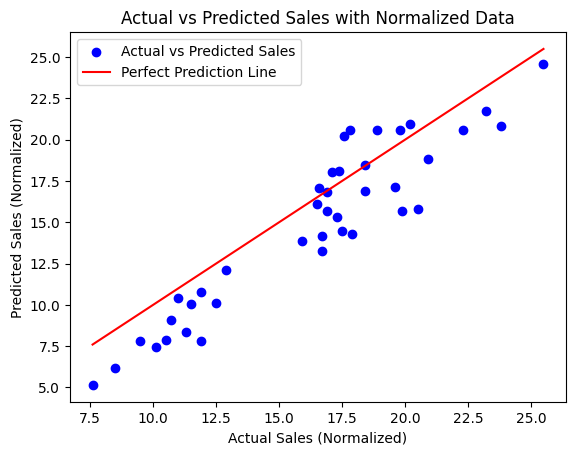

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Perfect Prediction Line')
plt.xlabel('Actual Sales (Normalized)')
plt.ylabel('Predicted Sales (Normalized)')
plt.title('Actual vs Predicted Sales with Normalized Data')
plt.legend()
plt.show()


7) Sales prediction with TV and Radio against Sales

In [ ]:
X=fd[['Radio','Newspaper']]
y=fd['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

#Linear Regression model
lr.fit(X_train,y_train)

LinearRegression()

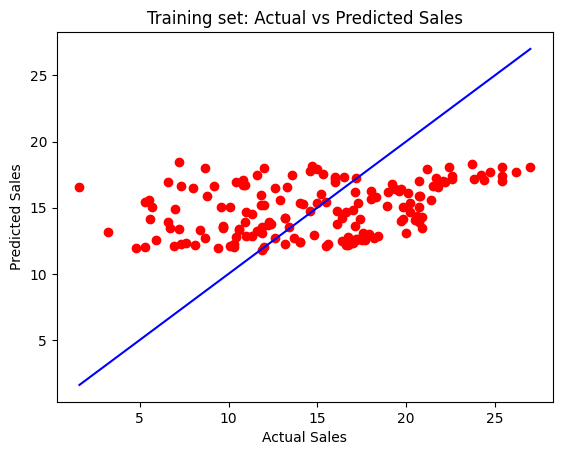

In [ ]:
y_pred = lr.predict(X_train)
plt.scatter(y_train, y_pred, color = 'red')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color = 'blue', linestyle='-')
plt.title('Training set: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()